In [18]:
# INIT

In [1]:
import pandas  as pd
import pickle
import matplotlib.pyplot
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import matplotlib.pyplot as plt
from functools import reduce
from tqdm import tqdm
import  snakeviz

import itertools
from scipy.stats import binom


In [2]:
sys.path.append('C:\Repos\WhoCell\who_cell')
sys.path.append('C:\Repos\WhoCell')
sys.path.append('C:/Repos/WhoCell/who_cell/simulation/')
sys.path.append('C:\Repos\WhoCell\who_cell\experiments')
sys.path.append('C:/Repos/WhoCell/who_cell/models')
sys.path.append('C:\Repos\pomegranate')


from pomegranate import *
import pomegranate as pome
import transitions_dict
import who_cell
from gibbs_experiments import GibbsExperiment
from gibbs_sampler import GibbsSampler
from simulation_for_gibbs import Simulator_for_Gibbs

# test sample_traj_for_few_obs times

In [3]:
number_of_inputs = 1000
N_max = 12
p_prob_of_observation = 0.7

In [4]:
long_vectors = [list(np.random.randn(np.random.randint(2,N_max))) for i in range(number_of_inputs)]
# long_vectors = [list(np.random.randn(N_max)) for i in range(number_of_inputs)]

In [5]:
def _sample_n_points_from_traj(full_sample,_n):
    ws = sorted(np.random.choice(range(len(full_sample)), _n, replace=False))
    return ([full_sample[i] for i in ws],ws)

In [6]:
results = [] 

for vec in long_vectors :
    binom_dist = binom(len(vec), p_prob_of_observation)
    n_of_obs = binom_dist.rvs(1)
    n_of_obs = n_of_obs if n_of_obs > 2 else 2
    _new_vec = _sample_n_points_from_traj(vec,n_of_obs)
    results.append(_new_vec)

In [7]:
results[1]

([-0.7880353474101042,
  -0.7599086302825049,
  1.7427133881488195,
  -0.7028320334672464],
 [0, 1, 2, 4])

# create pome distrbution or update

In [8]:
# %%timeit
res_0 = [] 
for i in range(1000) : 
    dist = pome.NormalDistribution(i,0.1)
    res_0.append(dist.probability(i))
# print(res_0)

In [9]:
# %%timeit
res_1 = [] 
dist = pome.NormalDistribution(1,0.1)
for i in range(1000) : 
    dist.parameters = [i,0.1]
    res_1.append(dist.probability(i))
# print(res_1)

In [10]:
# %%timeit
res_2 = [] 
dist = pome.NormalDistribution(1,0.1)
for i in range(1000) : 
    res_2.append(dist.probability(1))
# print(res_1)

In [11]:
a = set(range(-3,5))
b = set(range(9))

In [12]:
a = np.random.randint(0,100,1000)
b = np.random.randint(0,100,1000)

c = np.random.randint(0,100,1000)
d = np.random.randint(0,100,1000)

froms = list(map(lambda x:(x[0],x[1]),zip(a,b)))
tos = list(map(lambda x:(x[0],x[1]),zip(c,d)))


In [13]:
# %%timeit
def _sample_trans_matrix( trans_prob, from_state, to_state,is_acyclic):
    if ((not is_acyclic) and ((to_state[1] - from_state[1]) != 1)) : return 0
    if from_state not in trans_prob.keys() : return 0
    if to_state not in trans_prob[from_state].keys() : return 0

    return trans_prob[from_state][to_state]

_d = {(i,i):{(j,j):j for j in range(100)} for i in range(100)}
res = [_sample_trans_matrix( _d, _f, _t,True) for _f,_t in zip(froms,tos)]
res = [_sample_trans_matrix( _d, _f, _t,False) for _f,_t in zip(froms,tos)]


In [14]:
# %%timeit
def _sample_trans_matrix( trans_prob, from_state, to_state,is_acyclic):
    if from_state not in trans_prob.keys() : return 0
    if to_state not in trans_prob[from_state].keys() : return 0
    if ((not is_acyclic) and ((to_state[1] - from_state[1]) != 1)) : return 0

    return trans_prob[from_state][to_state]

_d = {(i,i):{(j,j):j for j in range(100)} for i in range(100)}
res = [_sample_trans_matrix( _d, _f, _t,True) for _f,_t in zip(froms,tos)]
res = [_sample_trans_matrix( _d, _f, _t,False) for _f,_t in zip(froms,tos)]


In [15]:
# %%timeit
def _sample_trans_matrix( trans_prob, from_state, to_state,is_acyclic,kes):
    if from_state not in kes : return 0
    if to_state not in trans_prob[from_state].keys() : return 0
    if ((not is_acyclic) and ((to_state[1] - from_state[1]) != 1)) : return 0

    return trans_prob[from_state][to_state]

_d = {(i,i):{(j,j):j for j in range(100)} for i in range(100)}
_d_keys = set(_d.keys())
res = [_sample_trans_matrix( _d, _f, _t,True,_d_keys) for _f,_t in zip(froms,tos)]
res = [_sample_trans_matrix( _d, _f, _t,False,_d_keys) for _f,_t in zip(froms,tos)]


In [16]:
l = list(range(100))

In [17]:
l[::4]

[0,
 4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 36,
 40,
 44,
 48,
 52,
 56,
 60,
 64,
 68,
 72,
 76,
 80,
 84,
 88,
 92,
 96]

# compare transitions matrixes

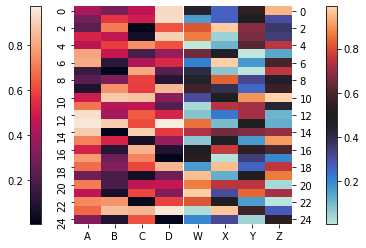

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df =  pd.DataFrame(np.random.rand(25,4), columns=list("ABCD"))
df2 = pd.DataFrame(np.random.rand(25,4), columns=list("WXYZ"))

fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df, cmap="rocket", ax=ax, cbar=False)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()